In [1]:
# Import Pandas and NumPy
import pandas as pd, numpy as np

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing all datasets
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# The dimensions of the dataframe
df.shape

(99999, 226)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Data cleaning

In [6]:
# Some columns are not useful for us. We can remove them directly
columns_to_drop = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9',\
                   'mobile_number','circle_id']
df=df.drop(columns_to_drop,axis=1)

In [7]:
# date_of_last_rech is not useful as recharge amount directly gives insight of this recharge on that month
# date_of_last_rech_data also is directly inferred from total_rech_data
columns_to_drop = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',\
                   'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
df=df.drop(columns_to_drop,axis=1)

In [8]:
df.shape

(99999, 212)

In [9]:
# Check column-wise null percentages
round(100*(df.isnull().sum()/len(df.index)),2)

loc_og_t2o_mou       1.02
std_og_t2o_mou       1.02
loc_ic_t2o_mou       1.02
arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
arpu_9               0.00
onnet_mou_6          3.94
onnet_mou_7          3.86
onnet_mou_8          5.38
onnet_mou_9          7.75
offnet_mou_6         3.94
offnet_mou_7         3.86
offnet_mou_8         5.38
offnet_mou_9         7.75
roam_ic_mou_6        3.94
roam_ic_mou_7        3.86
roam_ic_mou_8        5.38
roam_ic_mou_9        7.75
roam_og_mou_6        3.94
roam_og_mou_7        3.86
roam_og_mou_8        5.38
roam_og_mou_9        7.75
loc_og_t2t_mou_6     3.94
loc_og_t2t_mou_7     3.86
loc_og_t2t_mou_8     5.38
loc_og_t2t_mou_9     7.75
loc_og_t2m_mou_6     3.94
loc_og_t2m_mou_7     3.86
loc_og_t2m_mou_8     5.38
                    ...  
arpu_2g_9           74.08
night_pck_user_6    74.85
night_pck_user_7    74.43
night_pck_user_8    73.66
night_pck_user_9    74.08
monthly_2g_6         0.00
monthly_2g_7         0.00
monthly_2g_8

In [10]:
# All columns which has more than 30% values null
columns_to_drop = df.columns[df.apply(lambda df : round(100*(df.isnull().sum()/len(df.index)),2)>30)]
# All the columns getting dropped are consistent across June to September months, So our model wouldnt be affected.
columns_to_drop

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [11]:
# Removing all columns which has more than 30% values null
df=df.drop(columns_to_drop,axis=1)

In [12]:
# Columns which have only one unique value other than blank
columns_to_drop = df.columns[df.apply(lambda df : df.nunique()==1)]
# All the columns getting dropped are consistent across June to September months, So our model wouldnt be affected.
columns_to_drop

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [13]:
# Removing all columns with only one unique value
df=df.drop(columns_to_drop,axis=1)

In [14]:
# Check column-wise null percentages
df.columns[df.apply(lambda df : round(100*(df.isnull().sum()/len(df.index)),2)>0)]
# There are still columns with NaN.

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=108)

In [15]:
# Fill all NaN with median values
df = df.fillna(df.median())

In [16]:
df.shape

(99999, 165)

#### Derived columns

In [17]:
# High value customers are determined by average recharge amount in the first two months
df['average_recharge_amount_per_month_good'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

#### Filter high value customers

In [18]:
df['average_recharge_amount_per_month_good'].describe(percentiles = [0.70])
# 70th percentile cutoff is 368.50

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: average_recharge_amount_per_month_good, dtype: float64

In [19]:
# Retrieve high value customers
high_value_customers = df[(df['average_recharge_amount_per_month_good']>368.50)]
high_value_customers.shape
# We have 29979 rows and 166 columns

(29979, 166)

#### Define target variable - Churn

In [20]:
# Sum all the columns showing customer is active
high_value_customers['usage'] = high_value_customers[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]\
                                .sum(axis = 1) 

In [21]:
# calculate the churn column and drop the newly created 'usage' column, which is no longer required
high_value_customers['churn'] = np.where(high_value_customers['usage']> 0, 0,1)
high_value_customers = high_value_customers.drop('usage',axis=1)
high_value_customers['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

#### Remove all the attributes corresponding to the churn phase

In [22]:
# Drop all columns with '_9' in it
high_value_customers = high_value_customers.loc[:, ~high_value_customers.columns.str.contains('_9')]
high_value_customers.shape

(29979, 127)

### Model building

In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
high_value_customers.describe(percentiles=[.25, .5, .75, .90, .95, .99])
# Almost all the columns seem to have outliers.

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_recharge_amount_per_month_good,churn
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,587.587624,589.424681,535.067748,296.597992,304.918683,268.821645,419.142919,425.030619,378.042855,17.428073,...,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,6.554528,697.014644,0.08636
std,442.848876,463.049067,492.447887,460.722063,481.771118,466.202921,469.973639,485.988101,475.657798,79.192826,...,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,48.630605,488.925223,0.28090
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,369.000000,0.00000
25%,364.352500,365.235000,289.782000,41.170000,41.045000,32.360000,137.340000,135.690000,95.730000,0.000000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.00000
50%,495.951000,493.781000,452.232000,125.890000,125.560000,99.590000,282.260000,282.040000,241.040000,0.000000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,569.000000,0.00000
75%,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,0.000000,...,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,796.000000,0.00000
90%,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,32.740000,...,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,0.000000,1118.100000,0.00000
95%,1240.976700,1261.848400,1258.703300,1154.900000,1208.691000,1115.857000,1271.757000,1287.221000,1188.523000,94.663000,...,1.000000,1.000000,1.000000,3178.200000,819.257000,845.429000,762.122000,18.631000,1406.500000,1.00000
99%,1983.590100,1999.509680,1988.082260,2166.876000,2220.577600,2189.445800,2328.192600,2411.004400,2212.303000,349.546000,...,3.000000,3.000000,3.000000,3651.000000,1822.698400,1942.152800,1867.680000,173.336200,2217.000000,1.00000


In [24]:
high_value_customers = np.minimum(high_value_customers, pd.DataFrame(high_value_customers.quantile(0.99)).T)
# Checking outliers at 1%, 25%, 50%, 75%, 90%, 95% and 99% after setting 99th percentile to Max.
high_value_customers.describe(percentiles=[.01, .25, .5, .75, .90, .95, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_recharge_amount_per_month_good,churn
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,577.728397,579.378034,524.555512,287.917121,295.612741,259.550101,411.354652,416.439289,368.095600,14.818088,...,0.100304,0.103239,0.093966,1263.416225,120.468609,126.130999,112.271333,4.486627,686.115598,0.08636
std,337.205053,339.647984,370.925521,404.883189,419.760248,399.744488,421.098504,430.228758,403.522894,51.263410,...,0.427528,0.442786,0.431060,973.187199,318.585454,337.364761,313.189126,22.428761,347.678095,0.28090
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,369.000000,0.00000
1%,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,0.000000,...,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000,371.500000,0.00000
25%,364.352500,365.235000,289.782000,41.170000,41.045000,32.360000,137.340000,135.690000,95.730000,0.000000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.00000
50%,495.951000,493.781000,452.232000,125.890000,125.560000,99.590000,282.260000,282.040000,241.040000,0.000000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,569.000000,0.00000
75%,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,0.000000,...,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,796.000000,0.00000
90%,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,32.740000,...,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,0.000000,1118.100000,0.00000
95%,1240.976700,1261.848400,1258.703300,1154.900000,1208.691000,1115.857000,1271.757000,1287.221000,1188.523000,94.663000,...,1.000000,1.000000,1.000000,3178.200000,819.257000,845.429000,762.122000,18.631000,1406.500000,1.00000


### Test-Train Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Putting feature variable to X
X = high_value_customers.drop(['churn'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_recharge_amount_per_month_good
7,1069.180,1349.850,1988.08226,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
8,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,519.0
13,492.846,205.671,593.26000,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0.0,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0.0,380.0
16,430.975,299.869,187.89400,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0,459.0
17,690.008,18.980,25.49900,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0.0,0.0,0.0,0.0,667.0,0.00,0.00,0.00,0.0,408.0


In [27]:
# Putting response variable to y
y = high_value_customers['churn']

y.head()

7     1.0
8     0.0
13    0.0
16    0.0
17    0.0
Name: churn, dtype: float64

In [28]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_recharge_amount_per_month_good
88105,0.532426,0.590924,0.658310,0.015834,0.023701,0.024225,0.041367,0.547295,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.258715,0.000000,0.000000,0.000000,0.000000,0.012987
34588,0.613429,0.549137,0.377148,0.021455,0.016928,0.007815,0.040710,0.040390,0.042689,0.000000,...,0.000000,0.0,0.0,0.0,0.235955,0.075487,1.000000,0.020539,0.014134,0.062500
16623,0.744242,0.543590,0.499070,0.038332,0.011884,0.005417,0.194395,0.197445,0.099213,0.000000,...,0.333333,0.0,0.0,0.0,0.791126,0.758606,0.364498,0.364725,0.009865,0.222673
54904,0.637072,0.601203,0.670904,0.094740,0.043453,0.026733,0.109884,0.520231,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.339672,0.000000,0.000000,0.000000,0.000000,0.201840
33555,0.643729,0.486405,0.476479,0.001966,0.006107,0.015145,0.486382,0.294956,0.487587,0.002947,...,0.000000,0.0,0.0,0.0,0.060213,0.000000,0.000000,0.000000,0.000000,0.055195


In [31]:
### Checking the Churn Rate
churn_rate = (sum(high_value_customers['churn'])/len(high_value_customers['churn'].index))*100
churn_rate
# churn_rate is very less (8.64%). We need to handle class imbalance while building model

8.636045231662164

#### Correlation among attributes

In [32]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

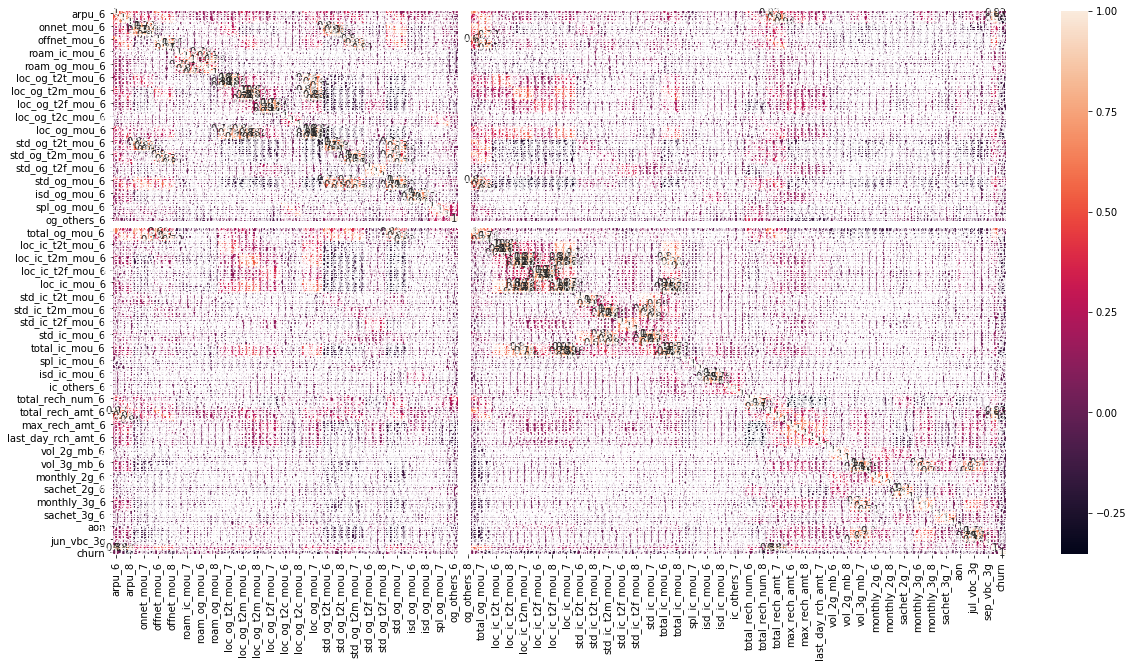

In [33]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(high_value_customers.corr(),annot = True)
plt.show()
# It is difficult to visualize wit 127 columns

In [34]:
corr_matrix = high_value_customers.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol.head(20)

# There are many features very high (+ve/-ve) corelation
# Instead of dropping these features, we can perform a PCA

arpu_8            total_rech_amt_8                          0.938782
arpu_6            total_rech_amt_6                          0.922340
arpu_7            total_rech_amt_7                          0.911433
loc_ic_mou_6      total_ic_mou_6                            0.900691
loc_ic_mou_8      total_ic_mou_8                            0.898518
loc_ic_mou_7      total_ic_mou_7                            0.892760
loc_ic_t2m_mou_6  loc_ic_mou_6                              0.887244
loc_ic_t2m_mou_8  loc_ic_mou_8                              0.886759
loc_ic_t2m_mou_7  loc_ic_mou_7                              0.877778
onnet_mou_8       std_og_t2t_mou_8                          0.870726
std_ic_t2m_mou_8  std_ic_mou_8                              0.867507
onnet_mou_7       std_og_t2t_mou_7                          0.864901
std_ic_t2m_mou_7  std_ic_mou_7                              0.864439
std_ic_t2m_mou_6  std_ic_mou_6                              0.862815
onnet_mou_6       std_og_t2t_mou_6

In [35]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [36]:
# Perform PCA on normalized data frame
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
#Create PCA data frame from performed PCA
colnames = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'Feature':colnames})
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,0.032362,0.061301,0.053380,-0.015699,-0.023906,-0.004393,0.122734,0.033869,0.043647,arpu_6
1,0.043430,0.100234,0.095183,-0.020676,-0.029738,-0.000598,-0.020043,0.034724,0.006485,arpu_7
2,0.064353,0.114380,0.117484,-0.027787,-0.029474,0.000395,-0.137974,0.039802,-0.011338,arpu_8
3,-0.040548,0.167445,-0.040023,-0.207915,0.206199,-0.044642,0.190323,0.042369,0.074561,onnet_mou_6
4,-0.044914,0.192895,-0.020188,-0.224708,0.223602,-0.042014,-0.026409,0.022929,0.014450,onnet_mou_7
5,-0.028394,0.183335,-0.004314,-0.202463,0.196593,-0.033611,-0.136341,0.021434,-0.009850,onnet_mou_8
6,0.043748,0.157898,-0.009690,0.149784,-0.231945,-0.048843,0.215268,-0.010190,0.064904,offnet_mou_6
7,0.040742,0.181890,0.016291,0.163749,-0.236949,-0.043242,-0.027094,-0.030025,-0.006457,offnet_mou_7
8,0.059277,0.182737,0.034053,0.140074,-0.215669,-0.040351,-0.161331,-0.014654,-0.029293,offnet_mou_8
9,0.001449,0.008675,0.048908,0.044700,0.025057,-0.025765,-0.052597,0.193040,0.002982,roam_ic_mou_6


In [38]:
print("Variance of each component is " , pca.explained_variance_ratio_, "\n")
print("Cumulative variance of component is " , np.cumsum(pca.explained_variance_ratio_))

Variance of each component is  [1.31021744e-01 1.13118335e-01 6.14298559e-02 4.68421446e-02
 4.37020158e-02 4.24223874e-02 3.16441219e-02 2.64445172e-02
 2.51354594e-02 2.41731805e-02 2.25770441e-02 1.99529276e-02
 1.96627732e-02 1.83954630e-02 1.70007660e-02 1.54638560e-02
 1.44869025e-02 1.36555945e-02 1.34389812e-02 1.27143126e-02
 1.12818771e-02 9.82934443e-03 9.50913742e-03 9.28020223e-03
 9.06186258e-03 8.47400003e-03 7.88322335e-03 7.60730823e-03
 7.43245920e-03 7.21572402e-03 7.04170361e-03 6.87869732e-03
 6.70763327e-03 6.53995971e-03 6.39705165e-03 6.22193063e-03
 6.09242193e-03 5.98055085e-03 5.66562638e-03 5.33485539e-03
 5.11205908e-03 5.05167107e-03 4.72266485e-03 4.69744484e-03
 4.57856730e-03 4.42762313e-03 4.33307359e-03 4.18279241e-03
 3.96412771e-03 3.72338314e-03 3.59839601e-03 3.52745149e-03
 3.23436483e-03 3.03370347e-03 3.02360807e-03 2.96662538e-03
 2.86734344e-03 2.84850406e-03 2.67385009e-03 2.62842211e-03
 2.56272539e-03 2.44392041e-03 2.34242421e-03 2.290669

#### Scree plot

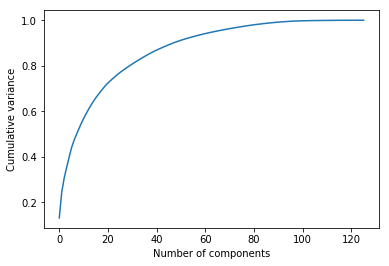

In [39]:
# Screeplot to check components explaining variance
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance')
plt.show()
# As can be seen in number as well as screeplot, 48 components explain 90.08 variance

In [40]:
prdt = np.dot(pca.components_[0],pca.components_[1])
prdt.round(10)
# First two components are orthogonal to each other

-0.0

In [41]:
# Use PCA with 48 components, as they cover 90% of variance
pca_final = PCA(n_components=48) 

In [42]:
df_pca = pca_final.fit_transform(X_train)
df_pca.shape

(20985, 48)

In [43]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

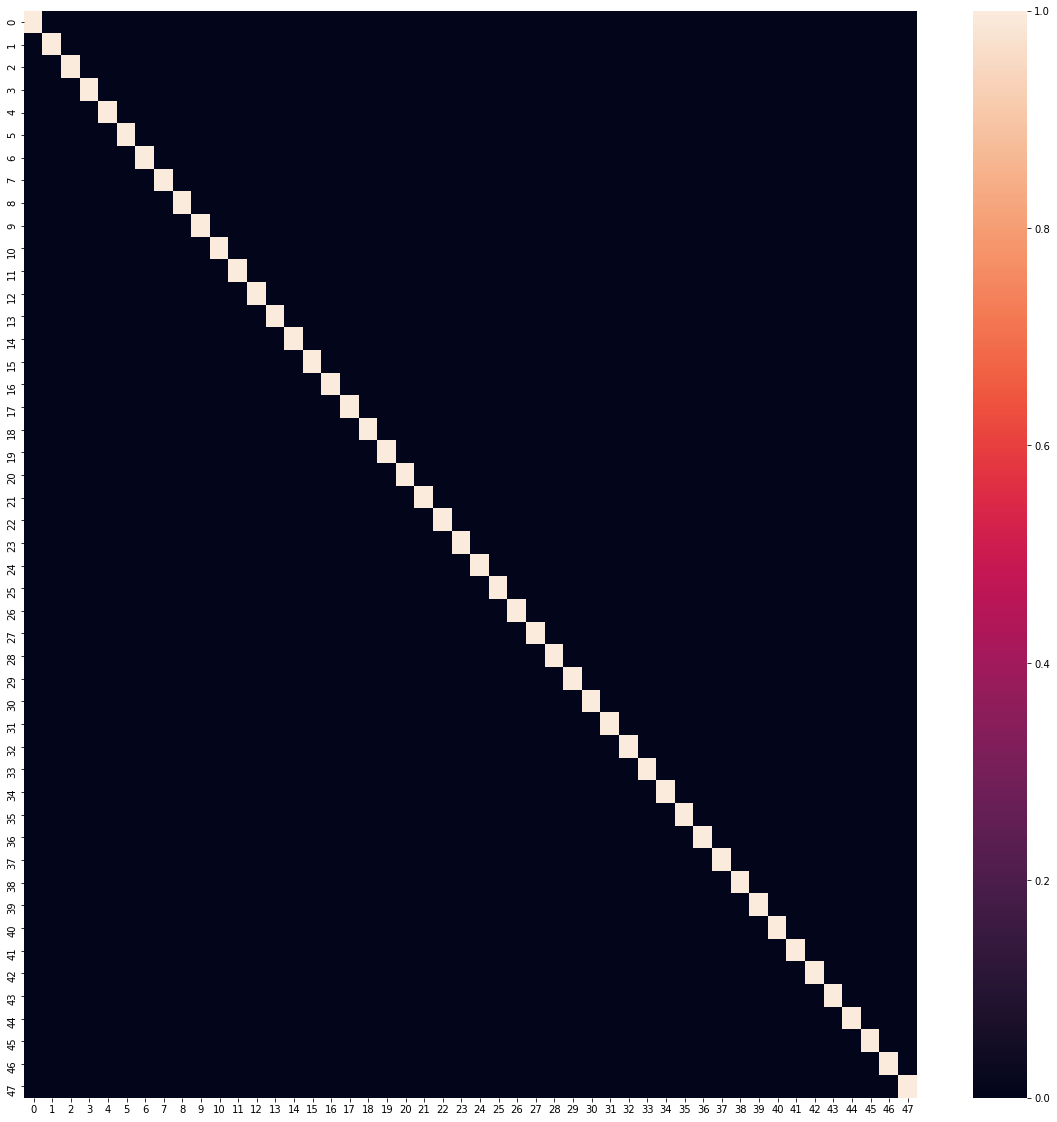

In [44]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,20))   # Fig size
sns.heatmap(corrmat)
# Plot shows the almost no correlation among the Principal components.

In [45]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# correlations are very close to 0

max corr: 8.886171764085854e-16 , min corr:  -9.523971068692643e-16


In [46]:
# Scale X_test before transformation
X_test[X_test.columns] = scaler.transform(X_test)

In [47]:
# Applying selected components to the test data - 48 components

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 48)

 ### Model 1 - SVC  Linear

In [48]:
# Modeling using SVC
# Data Modeling using Linear model
from sklearn.svm import SVC

# class_weight = balanced to handle class imbalance
model_linear = SVC(kernel='linear', class_weight='balanced')
model_linear.fit(df_pca, y_train)

# predict
y_pred = model_linear.predict(df_test_pca)

In [49]:
from sklearn import metrics
# accuracy of the linear model
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.8344451856793418 



In [50]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

[[6839 1340]
 [ 149  666]]
recall 0.8171779141104294


### Model 2 - SVC - rbf - to check if non linear model performs better

In [51]:
# Data Modeling using non-Linear model with rbf
# Use rbf kernel

# model
# class_weight = balanced to handle class imbalance
non_linear_model = SVC(kernel='rbf', class_weight='balanced')

# fit
non_linear_model.fit(df_pca, y_train)

# Note scaling was already performed on X_test during linear model prediction. No need to scale it again.

# predict
y_pred = non_linear_model.predict(df_test_pca)

In [52]:
# accuracy of the non linear model
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.8472314876584389 



In [53]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))


[[6971 1208]
 [ 166  649]]
recall 0.7963190184049079


### Sensitivity/recall has reduced when we moved from linear to rbf model
#### Note: Sensitivity is more accurate parameter than accuracy, as we don't want to miss any high value customer to be churned 

#### No need to perform Grid Search for Gamma and C as the linear model performs better than the default non linear model

### Model 3 - Logistic Regression

In [64]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_pca,y_train)

In [65]:
# Making prediction on the test data - Accuracy
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [66]:
# Predict the values in y_pred
y_pred = model_pca.predict(df_test_pca)

In [67]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[6660 1519]
 [ 143  672]]


In [69]:
# recall/sensitivity
print("Recall / Sensitivity", metrics.recall_score(y_test, y_pred))

Recall / Sensitivity 0.8245398773006135


In [71]:
# precision
print("Precision", metrics.precision_score(y_test, y_pred))

Precision 0.30670926517571884


### Solution to Question 1: Build a model to predict whether a high-value customer will churn, in near future

#### A comparison between Logistic Regression and SVC  - Linear shows that Logistic regression have performed better with a Recall of 82.45% and Accuracy of 89%
#### Recall of 82.45% is very good as we are able to capture 82.45% of churned customers

### Question 2: Identify important variables that are strong predictors of churn

#### PCA doesnt give predictor columns. We can use Random Forest to predict the crtical columns

##### Model 4 - Default RandomForestClassifier model with no hyper parameters

In [99]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Create decision tree classifer object
rfc = RandomForestClassifier(class_weight="balanced")

In [100]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [101]:
# Making predictions
predictions = rfc.predict(X_test)

In [102]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=predictions))

[[8071  108]
 [ 481  334]]


In [103]:
# recall/sensitivity
print("Recall / Sensitivity", metrics.recall_score(y_test, predictions))

Recall / Sensitivity 0.4098159509202454


#### Model 5 - Grid search -  RandomForest

In [110]:
param_grid = {
    'max_depth': [2,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="recall",
                          cv = 3, n_jobs = -1,verbose = 1)

In [111]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  7.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [112]:
# printing the optimal score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7779007121474367 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}


####  Model 6 - Final RandomForestClassifier model with optimized hyper paramaters

In [145]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=10,
                             class_weight="balanced",
                             n_estimators=100)

In [146]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=400, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [147]:
# predict on Final RandomForestClassifier model with optimized hyper paramaters
predictions = rfc.predict(X_test)

In [148]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
# Confusion matrix looks good with low False Negative and high True Negative

[[7369  810]
 [ 184  631]]


In [149]:
# Recall / sensitivity
print("Recall / Sensitivity", metrics.recall_score(y_test, predictions))

Recall / Sensitivity 0.7742331288343558


In [150]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=predictions), "\n")

accuracy: 0.88948187680676 



##### Recall of 77.42 % and Accuracy of 88.94% is good for the Random Forest model

#### Important features

In [156]:
importances = list(rfc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: total_ic_mou_8       Importance: 0.15
Variable: arpu_8               Importance: 0.06
Variable: last_day_rch_amt_8   Importance: 0.06
Variable: loc_og_t2m_mou_8     Importance: 0.05
Variable: loc_og_mou_8         Importance: 0.05
Variable: total_og_mou_8       Importance: 0.05
Variable: roam_ic_mou_8        Importance: 0.04
Variable: roam_og_mou_8        Importance: 0.04
Variable: loc_ic_t2t_mou_8     Importance: 0.04
Variable: loc_ic_t2m_mou_8     Importance: 0.04
Variable: loc_ic_mou_8         Importance: 0.04
Variable: offnet_mou_8         Importance: 0.03
Variable: loc_og_t2t_mou_8     Importance: 0.03
Variable: total_rech_amt_8     Importance: 0.03
Variable: loc_og_t2f_mou_8     Importance: 0.02
Variable: std_ic_mou_8         Importance: 0.02
Variable: total_rech_num_8     Importance: 0.02
Variable: max_rech_amt_8       Importance: 0.02
Variable: onnet_mou_8          Importance: 0.01
Variable: loc_og_mou_7         Importance: 0.01
Variable: std_og_t2m_mou_8     Importanc

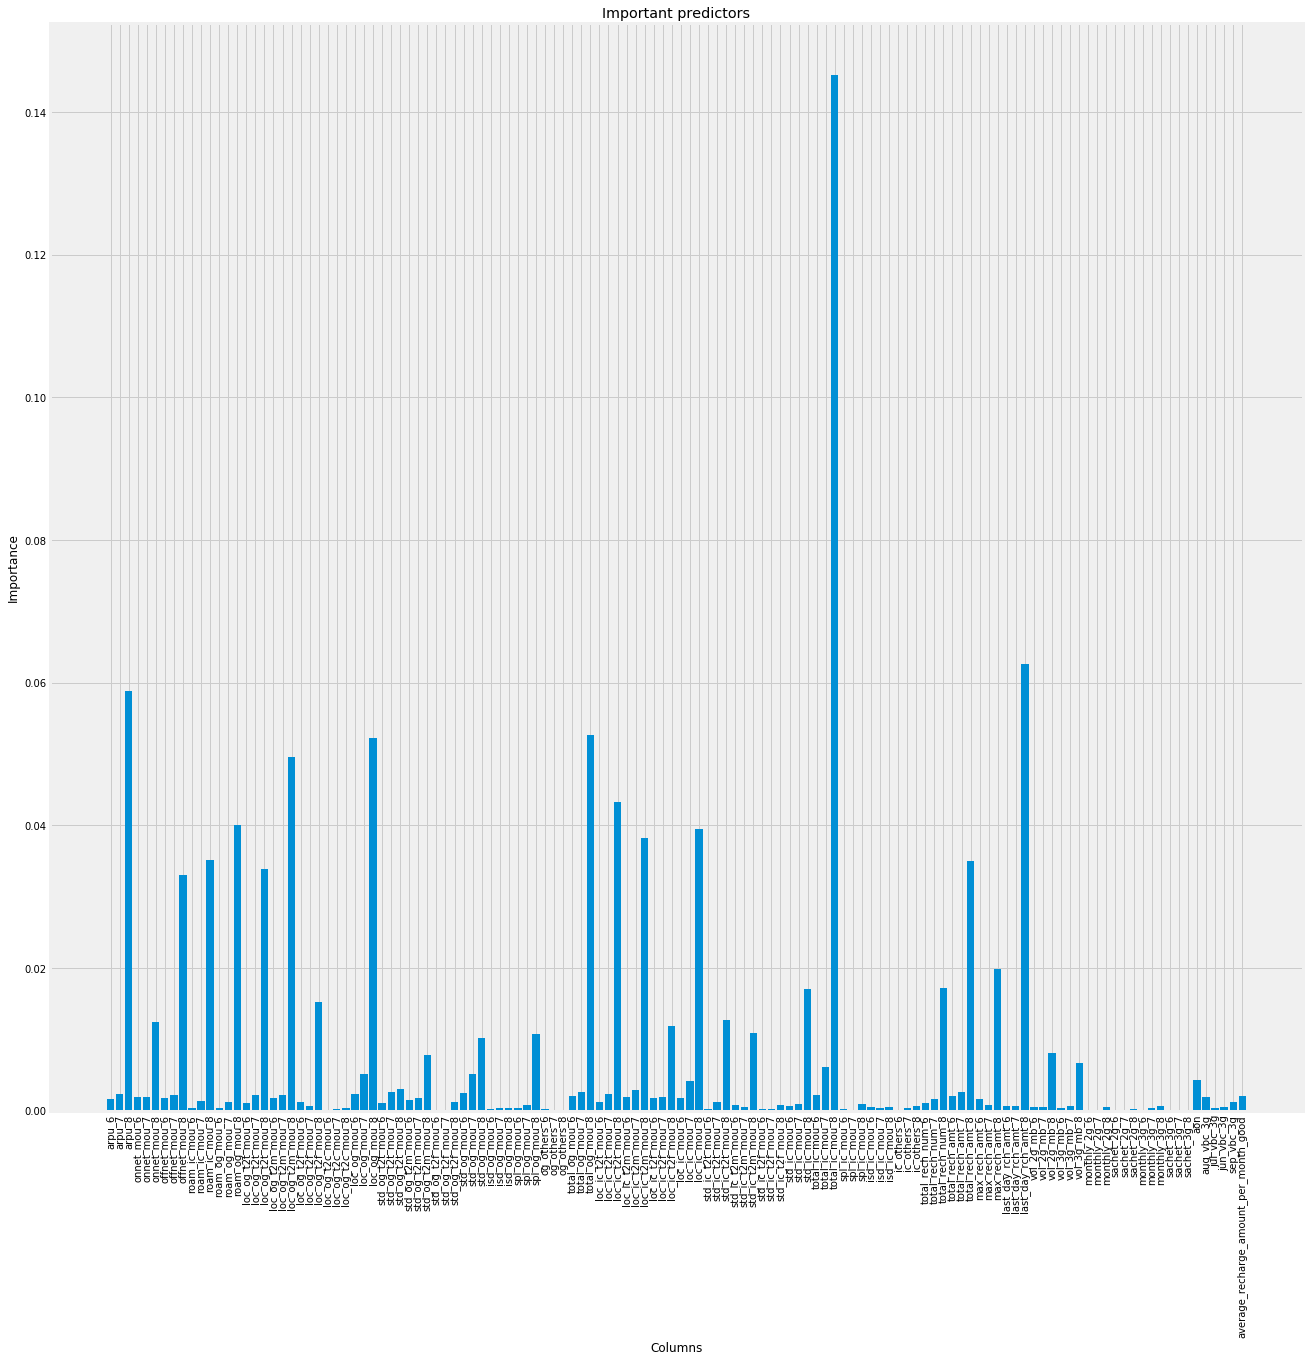

In [173]:
%matplotlib inline
plt.figure(figsize = (20,20))   # Fig size
# list of x locations for plotting
x_values = list(range(len(importances))) 
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_train.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Columns'); plt.title('Important predictors');

##### Top 11 important predictor columns are total_ic_mou_8, arpu_8, last_day_rch_amt_8, loc_og_t2m_mou_8, loc_og_mou_8, 
##### total_og_mou_8, roam_ic_mou_8, roam_og_mou_8, loc_ic_t2t_mou_8, loc_ic_t2m_mou_8 and loc_ic_mou_8

#### Summary Statistics of  predictor columns

In [177]:
critical_columns = ['total_ic_mou_8', 'arpu_8', 'last_day_rch_amt_8', \
                    'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'roam_ic_mou_8', \
                    'roam_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'churn']
high_value_customers[critical_columns].describe()

,total_ic_mou_8,arpu_8,last_day_rch_amt_8,loc_og_t2m_mou_8,loc_og_mou_8,total_og_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,churn
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,288.747657,524.555512,91.687781,164.412484,256.159253,613.238083,10.598445,17.589295,60.422740,150.288676,231.023659,0.08636
std,316.599890,370.925521,110.360527,204.753994,311.631305,618.024342,40.387159,62.838544,95.868953,177.413675,263.384498,0.28090
min,0.000000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,78.930000,289.782000,0.000000,28.480000,48.040000,188.965000,0.000000,0.000000,8.580000,35.940000,60.035000,0.00000
50%,193.530000,452.232000,50.000000,89.880000,148.280000,435.810000,0.000000,0.000000,26.840000,89.830000,142.880000,0.00000
75%,380.450000,671.349500,130.000000,223.615000,348.340000,833.435000,0.000000,0.000000,70.360000,197.015000,302.110000,0.00000
max,1746.503400,1988.082260,619.000000,1092.917000,1689.533800,3252.238600,288.536400,432.999600,621.931400,976.290600,1460.032600,1.00000
